In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime,  statsmodels.formula.api as smf, matplotlib.dates as mdates
from zipfile import ZipFile
from StringIO import StringIO
from scipy import stats
import urllib2
%matplotlib inline
plt.style.use('ggplot')

In [2]:
bike_months = [
    '201501',
    '201504',
    '201507',
    '201510'
]

In [3]:
def convertTime(d):
    if len(d)<17:
        dt = datetime.datetime.strptime(d, '%m/%d/%Y %H:%M')
    else:
        dt = datetime.datetime.strptime(d, '%m/%d/%Y %H:%M:%S')
    dt = dt.replace(day=1, month=1, minute=0, year=2015)
    return dt

frames = []
for m in bike_months:
    url = 'https://s3.amazonaws.com/tripdata/%s-citibike-tripdata.zip'%m
    r = urllib2.urlopen(url).read()
    myfile = ZipFile(StringIO(r))
    df_csv = myfile.open('%s-citibike-tripdata.csv'%m)
    df = pd.read_csv(df_csv, converters={'starttime': convertTime})
    frames.append(df)

df_cb = pd.concat(frames, ignore_index=True)
df_cb

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,2015-01-01 00:00:00,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,2015-01-01 00:00:00,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,2015-01-01 00:00:00,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,2015-01-01 00:00:00,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,2015-01-01 00:00:00,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1
5,496,2015-01-01 00:00:00,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969,2
6,152,2015-01-01 00:00:00,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972,1
7,1183,2015-01-01 00:00:00,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985,2
8,846,2015-01-01 00:00:00,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991,1
9,576,2015-01-01 00:00:00,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991,1


In [4]:
df_cb['hour'] = df_cb.apply(lambda x: x['starttime'].hour, axis=1)
trips = df_cb.groupby('hour').count()['tripduration']
trips

hour
0      30585
1      16867
2       9997
3       6080
4       5786
5      18175
6      71719
7     147801
8     263072
9     210807
10    141071
11    146739
12    170416
13    177553
14    184574
15    195470
16    230453
17    322696
18    306639
19    212578
20    140784
21     98703
22     75887
23     51443
Name: tripduration, dtype: int64

In [5]:
trips = trips/120.0 #get daily amount

In [6]:
def convertTime1(d):
    dt = datetime.datetime.strptime(d, '%H:%M')
    dt = dt.replace(day=1, month=1, minute=0, year=2015)
    return dt

df_pd = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions.csv', converters={'TIME': convertTime1})
df_pd['HOUR'] = df_pd.apply(lambda x: x['TIME'].hour, axis=1)
c_inj_agg = df_pd.groupby('HOUR').sum()['NUMBER OF CYCLIST INJURED']
c_k_agg = df_pd.groupby('HOUR').sum()['NUMBER OF CYCLIST KILLED']
cyc = c_inj_agg + 10*c_k_agg

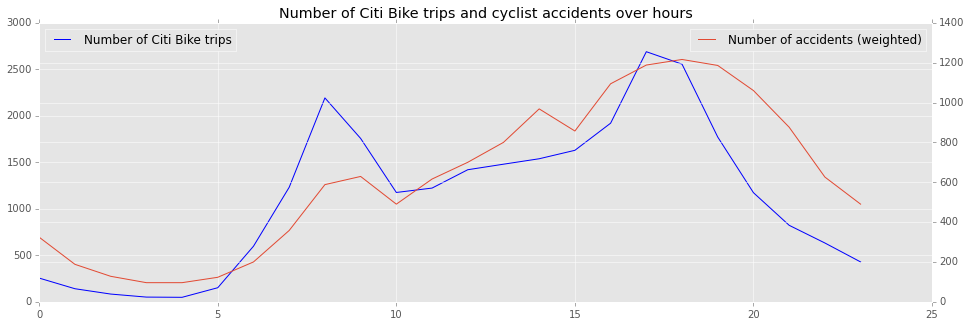

In [13]:
fig, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(trips.index, trips, color='b', label='Number of Citi Bike trips')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(cyc.index, cyc, label='Number of accidents (weighted)')
plt.title('Number of Citi Bike trips and cyclist accidents over hours')
ax2.legend(loc=1)

In [14]:
from scipy import stats
corr=stats.pearsonr(trips,cyc)[0]
print('Correlation bewteen Citi Bike trips and cyclist accidents: {0}'.format(corr))

Correlation bewteen Citi Bike trips and cyclist accidents: 0.8322596928
